In [1]:
from os.path import join
import matplotlib.pyplot as plt
import earthaccess

import geopandas as gpd
import rasters as rt

from EMITL2ARFL import *

In [2]:
# Configure logging to see info messages
import logging
logging.basicConfig(level=logging.INFO, format='%(name)s - %(levelname)s - %(message)s')

date range

In [3]:
start_date_UTC = "2023-01-01"
end_date_UTC = "2023-12-31"

download directory

In [4]:
download_directory = "~/data/EMIT_download"

output directory

In [5]:
output_directory = "~/data/Kings Canyon EMIT 2023"

Upper Kings area of interest

In [6]:
gdf = gpd.read_file("upper_kings.kml")
gdf

,Name,Description,geometry
0,0,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-118.75179 36.85601 0, -118...."


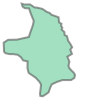

In [7]:
gdf.geometry[0]

In [8]:
bbox_UTM = rt.Polygon(gdf.unary_union).UTM.bbox
bbox_UTM

/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_93143/4116591760.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bbox_UTM = rt.Polygon(gdf.unary_union).UTM.bbox


BBox(xmin=878372.1496506371, ymin=4058894.2146899896, xmax=917059.9433665382, ymax=4119262.3546824204, crs="EPSG:32610")

In [9]:
grid = rt.RasterGrid.from_bbox(bbox_UTM, cell_size=60, crs=bbox_UTM.crs)
grid

{
  "dimensions": {
    "rows": 1006,
    "cols": 644
  },
  "bbox": {
    "xmin": 878372.1496506371,
    "ymin": 4058902.3546824204,
    "xmax": 917012.1496506371,
    "ymax": 4119262.3546824204
  },
  "crs": "EPSG:32610",
  "resolution": {
    "cell_width": 60.0,
    "cell_height": -60.0
  }
}

Log into `earthaccess` using `netrc` credentials

In [10]:
earthaccess.login(strategy="netrc", persist=True)

earthaccess.auth - INFO - You're now authenticated with NASA Earthdata Login


In [11]:
merged_cube = retrieve_EMIT_L2A_RFL(
    date_UTC=date_UTC,
    geometry=grid
)

merged_cube

NameError: name 'date_UTC' is not defined

In [ ]:
output_directory = "~/data/Kings Canyon EMIT"

filenames = generate_EMIT_L2A_RFL_timeseries(
    start_date_UTC=start_date_UTC,
    end_date_UTC=end_date_UTC,
    geometry=grid,
    output_directory=output_directory
)

filenames

In [ ]:
for filename in filenames:
    print(filename)
    raster = MultiRaster.open(filename)
    display(raster)